# Tutorial - My Instagram Network
<strong>Contents:</strong>
1. Introduction
2. Methodology
3. Data Collection
4. Network Analysis
5. Graph Customization


## Introduction
Visualizing our Instagram networking is an exciting thing, but many are restrained because Instagram does not provide sufficient API, unlike other social media do. To address it, an operational, concise, easy-to-understand building process for Instagram networks will be introduced. It includes scraping profiles of followers or followings, analysing network structure, and network visualization.

## Methodology
<ul>
<li><strong>Instagram data scraping:</strong> A open source instagram data scraper is used. The tool was developed in 2019 by a Data Science student, MaximPiessen, in Belgium. Instead of calling API, it uses Selenium WebDriver.</li>
<li><strong>Network data analysis and visualization:</strong> <a href="https://networkx.org">Networkx</a>, a Python package, is used to reveal the charateristics of networks and visualizing network structures. Networkx uses Matplotlib as the data visualization library.</li>
</ul>
<strong>Steps:</strong><br>
To analyze one's social network, one's follower list is obtained first, then for each follower, their following list is obtained, next in the following list find the accounts that are also in the one's follower list. Through this process, find the relationships of all one's followers.<br>
<img src="Methodology.png"></img><br>
As a student of Network Science, after analysing the real Instagram social network, we will be able to have a good understanding of online communities and social networks.
In a word, in the end of the tutorial, you will learn a scraper tool, an approach to quantify and qualify networks, and a couple of techniques to beautify network graphs.

## Data Collection
Instagram only provides very few API endpoints for retrieving data, so a variety of web scrapers developed by data scientists are used for the Instagram data collection. A easy-to-use scraper, developed in Python by MaximPiessen, is introduced for our data collection and can be accessed on https://github.com/MaximPiessen/instagram_network_analysis. We only use the code in '01 scraping'. A bit of modification has been made to be run better in the local environment and to meet the requirement of the tutorial.
The modification inculdes:
1. Don't output my relations with others in file 'relations.txt',so the node of 'me' is not displayed in graphs. This method reduces the file size, as opposed to the '--include_me' option provided in the original version.
2. Don't output the string of 'https://www.instagram.com/' in 'relations.txt', which is seen as redundancies.
3. Correct 'classname' for being able to locate the right elements in web page HTML prabably because of the change of programs on the Instagram server side. Because the code was 2 years old and the Instagram webpages change all times, some code are likely to be unable to work now. (Competing with anti-scraping techniques is a challenging to all network scrape tools.)
4. Modify sleep time and add codes for properly retryinig or suspending, once Instagram blocks requests.


### Step One: Download and run scraper
Modified scraping code can be downloaded from:<br>
https://ucliveac-my.sharepoint.com/:f:/g/personal/jli357_uclive_ac_nz/EkZI6InsQ1RDsXqsdcv_AjsBc_ctmVxsZ5zHY-BWcWcB8Q?e=bdOzth<br>
There are three python files:
<ul>
<li>bot.py: scraping class</li>
<li>get_my_followers.py: call scraping class to get one's all follwers and generate 'my_followers.txt'</li>
<li>get_relations.py: call scraping class to get the relations of one's all followers, and generate 'relations.txt'</li>
</ul>


### Step Two: Get my followers
Run 'my_followers.py' in terminal.<br>
$python get_my_followers.py --username {your_IG_username} --password {your_IG_password}

Notice:
1. Use your own instagram username and password to replace the ones in the example.
2. During the scraping, a new chrome will be opened and please make it partially visible otherwise often the server does not respond requets.
3. If Instagram blocks requests too many times and the running gets stuck, you can stop the process and re-start. (To be updated) 

Result:
'my_followers.txt' is generated and each line represents a follower link.



### Step Three: Get relations of followers
Run 'get_relations.py' in terminal.
$python get_relations.py --username {your_IG_username}  --password {your_IG_password} --relations_file relations.txt

Notice:
Besides the three points to notice in the step two.
1. The name of the generated file can be customized by the argument '--relations_file'. For example, modify to 'my_relations.txt'.
2. 'start_profile.txt' is used to save the last scraped follower's index. You can modify it and skip the follower that has thousands of followings to avoid scraping takes months. And no need to redo all scraping that have been done, due to manually stopping and restarting.
3. The scraping may take a few days or weeks since one person normally has over 100 followers or followings.

Result:
'relations.txt' is generated and each line represents a link (relation) from a follower to a followed account.


## Network Analysis
Now, it is the time to use 'relations.txt' generated in the last section. The file is the input of the entire analysis. No matter whether you have succeeded to generate your own 'relations.txt', in the next section, we will provide an example file for the demonstration.

### 1. Get started

In [2]:
# Load libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### 2. Get a glance at the network

DiGraph with 132 nodes and 733 edges


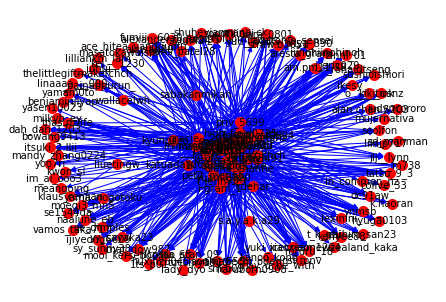

In [3]:
# Load the file
G = nx.read_edgelist('D:\\Study\\DATA419\\Tutorial\\instagram_network_analysis-master\\01 scraping\\relations.txt', 
                        nodetype=str, 
                        create_using=nx.DiGraph())
# The summary of the graph
print(nx.info(G))
# Draw the graph
nx.draw(G, with_labels=True, node_color='red', node_size=100, edge_color='blue', font_color='black', font_size=10)
plt.show()

### 3. Neighbours
In the Instagram network, successors represent followed persons, and predecessors represent followers. To find the successors and predecessors of one node (one person) in the network, we need to call DiGraph.predecessors() and DiGraph.successors().

In [8]:
print('Successors of diane_channe:', list(G.successors("diane_channe")))
print('Predecessors of diane_channe:', list(G.predecessors("diane_channe")))

Successors of diane_channe: ['shya_890', 'okitmyh', 'ynmsb_', 'yamam0to', 'priv_5699', 'f_jenny.23', 'sm.o09', 'ricosta_63', 'cuehar', '_painappurun_', 'naalune_eb', 'yuki_icecream1204', 'chihiro_san23', 't_k_pai', 'kiki_usnz', 'amapechi_oden', 'stjfh_', 'tatsu_9_3', '1ts_p01', 'kei___1230', 'nagatomo_sensei', 'masaki_goto56', 'hiroki_chch', '__m738', 'tucchiy1910', 'chat_dow987', 'tao_stan_09', 'iiinohiinohinoh']
Predecessors of diane_channe: ['stjfh_', 'hiroki_chch', 'f_jenny.23', 's.a.y.a.k.a29', 'masaki_goto56', 'cuehar', 'okitmyh']


After running the code above, we will see the all followers and followings of 'diane_channe'.

### 4. Dentisity
Dentisity shows how dense (sparse) a network is. To calculate it, divide the actual edge number in the network by the possible maximum number of edges. Networkx provides density() to output the statistic derectly.

In [12]:
nx.density(G)

0.04238954429794124

### 5. Degree
Further, we can find the network's 'average in-degree' and 'out-degree', 'degree distribution', and 'average shortest path length'. (to be improved)

[3, 1, 2, 2, 15, 4, 4, 6, 1, 42, 16, 8, 19, 15, 4, 5, 44, 34, 7, 5, 9, 7, 11, 4, 9, 11, 29, 14, 59, 13, 8, 6, 4, 6, 3, 15, 2, 19, 6, 3, 35, 4, 5, 7, 23, 12, 10, 10, 62, 7, 38, 25, 4, 9, 22, 14, 13, 39, 4, 10, 5, 14, 18, 41, 25, 10, 6, 7, 6, 22, 6, 5, 25, 16, 6, 31, 2, 8, 14, 7, 8, 10, 14, 11, 10, 16, 11, 2, 4, 4, 11, 2, 2, 32, 30, 5, 29, 16, 4, 1, 6, 4, 1, 2, 2, 4, 7, 4, 17, 31, 1, 3, 25, 1, 2, 1, 1, 1, 4, 6, 1, 2, 2, 1, 3, 1, 1, 3, 2, 1, 1, 1]


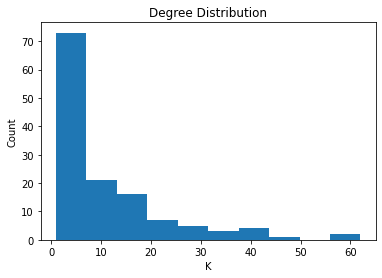

In [9]:
# Calculate the average in-degree and out-degree of the network. In theory, they are the same.
print('Average degree: {}'.format(G.number_of_edges() / G.number_of_nodes()))

# Plot the degree distribution.
degrees = [G.degree(n) for n in G.nodes()]
plt.hist(degrees)
plt.xlabel('K')
plt.ylabel('Count')
plt.title('Degree Distribution')
plt.show()

# Calculate the average shortest path length.
nx.average_shortest_path_length(G)

We can see a power law distribution of degrees. Most people have few links, while a few people have a larger number of relations.
Additionally, an exception is thrown if the network is directed and is not weakly connected. Use the code below to check the network attribute: is_weakly_connected.

In [ ]:
nx.is_weakly_connected(G) # To check if the network is weakly connected.

### 6. Centrality
Centrality is a measurement to estimate the importance of a node. In practice, there are three ways to figure out centrality. They are betweenness centrality, closeness centrality, and degree centrality.


#### <li>Betweenness centrality:</li>
'Betweenness centrality' can be used to measure the importance of nodes when diffusion process occurs in a network. In this case, the transmission of 'meme' can be a diffusion process.
One manifestation of 'betweenness centrality' is that the more shortest paths by which a node is crossed, the higher the betweenness centrality of the node is. Networkx provides the implementation.

In [3]:
betweenness = nx.centrality.betweenness_centrality(G)   # Return the betweenness centrality of all nodes.
highest_betweenness_node = max(G.nodes, key=betweenness.get)    # Return the node with the highest betweenness centrality.
# Output this node with the value of the betweenness centrality.
print(highest_betweenness_node) 
betweenness[highest_betweenness_node]

sleepyfish000


0.04621564110214233

#### <li>Closeness centrality:</li>
'Closeness centrality' presents how close a node is to other nodes.

In [4]:
closeness = nx.centrality.closeness_centrality(G)   # Return the closeness centrality of all nodes.
highest_closeness_node = max(G.nodes, key=closeness.get)    # Return the node with the highest closeness centrality.
# Output this node with the value of the closeness centrality.
print(highest_closeness_node)
closeness[highest_closeness_node]

chat_dow987


0.17496667878347266

#### <li>Degree centrality:</li>
Centrality of a node can be computed by how many links to or from the node. The in-degree centrality and out-degree centrality are computed respectively in code below.

In [7]:
in_degree = nx.centrality.in_degree_centrality(G)   # Return the in-degree centrality of all nodes.
highest_in_degree_node = max(G.nodes, key=in_degree.get)    # Return the node with the highest in-degree centrality.
# Output this node with the value of the in-degree centrality.
print(highest_in_degree_node)
in_degree[highest_in_degree_node]


0.12213740458015267

Please fill out the blank in the below code block to get the node with the highest out-degree centrality. (To be modified)

In [8]:

out_degree = (nx.centrality.out_degree_centrality(G))   # Return the out-degree centrality of all nodes.
highest_out_degree_node = (max(G.nodes, key=out_degree.get))    # Return the node with the highest out-degree centrality.
# Output this node with the value of the out-degree centrality.
(print(highest_out_degree_node))
(out_degree[highest_out_degree_node])

raymax6


0.3969465648854962

#### <li>EigenCentrality:</li>
'EigenCentrality' is also a way to measure centrality. It not only, as 'degree centrality', considers the degree of a node, but also considers the degrees of the neighbour nodes of the node. For example, if the degree of a node is small, take it granted, the influence of the node is small. But if the node is connected to a node which has numerous links, the influence of the original node is somehow increased.

In [9]:
eigenvector = nx.centrality.eigenvector_centrality(G)   # Return the eigenvector centrality of all nodes.
highest_eigenvector_node = max(G.nodes, key=eigenvector.get)    # Return the node with the highest eigenvector centrality.
# Output the node with the value of the eigenvector centrality.
print(highest_eigenvector_node)
eigenvector[highest_eigenvector_node]

ee_dimples


0.23401144692469172

#### <li>Page Rank</li>
'Page Rank' is a variant of eigenvector centrality.

In [10]:
pagerank = nx.pagerank(G)   # Return the page rank of all nodes.  
highest_pagerank_node = max(G.nodes, key=pagerank.get)    # Return the node with the highest page rank.
# Output the node with the value of the page rank.
print(highest_pagerank_node)
eigenvector[highest_pagerank_node]

sleepyfish000


0.16784155822157765

### 6. Clustering / Community detection
A community include nodes that have same properties. In 'my Instagram network', it could be my classmates at uni, my relatives, or my co-workers. 'Girvan-Newman' algorithm is used to identify communities. The principle of the algoritm is interatively removes the edge with the highest edge betweenness and compares the modularity between before and after. The code below demostrate the process. Finally, the best division of communities is selected.

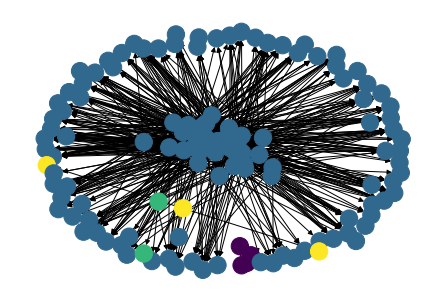

In [4]:
def community_detection(G_instagram):
    communities_generator = nx.algorithms.community.girvan_newman(G_instagram)
    communities_newman = next(communities_generator)
    modularity_newman_new = nx.algorithms.community.modularity(G_instagram, communities_newman)

    modularity_newman_old = 0.00001
    count = 1
    while modularity_newman_new > modularity_newman_old:
        modularity_newman_old = modularity_newman_new
        communities_newman_final = communities_newman
        communities_newman = next(communities_generator)
        modularity_newman_new = nx.algorithms.community.modularity(G_instagram, communities_newman)
        count += 1

    partition_newman = {}
    for idx, cluster in enumerate(communities_newman_final):
        for profile in cluster:
            partition_newman[profile] = idx

    return partition_newman

best_partition_map = community_detection(G)

node_colors = [best_partition_map[n] for n in G.nodes()]
nx.draw(G, with_labels=False, node_color=node_colors)

## Graph Customization
MaximPiessen's code provides a way of visualization featuring an interactive graph generated by .json and .js, which is great. An alternative way to improve the visulazation is the drawing functinality of Networkx and Matplotlib. 

In [ ]:
def exclude_max_group(partition_map):
    from collections import Counter
    counter = Counter(partition_map.values())
    biggest_group = max(counter, key=counter.get)

    new_partition_map = dict()
    # Iterate over all the items in dictionary and filter items which has even keys
    for (key, value) in partition_map.items():
        # Check if key is even then add pair to new dictionary
        if value != biggest_group:
            new_partition_map[key] = value

    labels = {}    
    for node in G.nodes():
        if node in new_partition_map.keys():
            #set the node name as the key and the label as its value 
            labels[node] = node

    return labels

Function 'exclude_max_group()' return a collection of nodes that are not in the biggest community, so that only nodes in small communities are labeled in the graph.

In [ ]:
# Drawing with a spring layout.
pos = nx.spring_layout(G)
# Define the graph size
plt.figure(3,figsize=(10,8))
# Draw the network
nx.draw(G, pos, with_labels=False, 
            node_color=node_colors, 
            arrows=True,
            arrowsize=8, 
            node_size=150, 
            edgecolors="gray", 
            edge_color = "gray", 
            linewidths =0.5, 
            width=0.5,
            font_size=10)
# Draw the labels
nx.draw_networkx_labels(G, pos, labels=exclude_max_group(best_partition_map), 
                            alpha=0.9, 
                            font_size=16, 
                            horizontalalignment="right", 
                            verticalalignment="top")
plt.show()

Networkx provides a lot of functions to draw graphs. 'nx.draw' draw a basic network and 'draw_network_labels' draw labels. Drawing can be customized by multiple options. More details can be viewed on https://networkx.org/documentation/stable/reference/drawing.html.

### Exercise:
Change the size of nodes in small communities to 200.